# DSC180A Checkpoint #2

## Setup

In [1]:
import re
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## ETL & feature extraction

In [1]:
# Parse specific ware and generate features
def generate_feature(path, ware_name, is_malware):
    print(ware_name)
    sml = ''
    i = 0
    for root, dirs, files in os.walk(path, topdown=False):  
        for name in files:
            if name.endswith('.smali'):
                if i >= 30000:
                    break
                f = open(os.path.join(root, name))
                sml += f.read() + '\n'
                f.close()
                i += 1
    df = pd.DataFrame(re.findall(r'invoke-(\w{5,9})\s.+}, (.*);->', sml))
    nums = df[0].value_counts()
    def get_num(name):
        try:
            return nums[name]
        except:
            return 0
    
    res = [ware_name, is_malware, i, df.shape[0], len(df[1].unique()), len(re.findall(r'\.method', sml)), get_num('direct'), 
           get_num('static'), get_num('virtual'), get_num('interface'), get_num('super')]
    return res, df[1].value_counts()

In [4]:
# Parse all training data in directory which contains all malware or benign-ware
def parse_all(path, is_mal):
    res = []
    wares = [i for i in os.listdir(path)]
    max_w = 0
    for d in wares:
        if max_w >= 8:
            return res
        d_path = path + '/' + d
        res.append(generate_feature(d_path, d, is_mal))
        max_w += 1
    return res

## Data Parsing

In [6]:
# Malware
path_mal = '/teams/DSC180A_FA20_A00/a04malware/malware' # Path
features_mal = run(path_mal, 1)

Kyview
Fjcon
Koler
Ksapp
FakeAV
Boxer
RuMMS
Kemoge


In [5]:
# Safeware
path_saf = '/teams/DSC180A_FA20_A00/a04malware/popular-apps' # Path
features_saf = run(path_saf, 0)

net.updategames.granny
com.gameloft.android.ANMP.GloftA8HM
com.devsisters.gb
com.huobi.cn
com.gretech.gomplayerko
com.buffstudio.sevendays_free
com.sega.comixzone
com.facebook.katana


## Model

In [3]:
# Build a baseline model and calculate mse
def mse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle = True)
    reg = LinearRegression().fit(X_train, y_train)
    y_predict_train = reg.predict(X_train)
    y_predict_test = reg.predict(X_test)
    print('train MSE = {}, test MSE = {}'.format(mean_squared_error(y_train, y_predict_train), 
                                                 mean_squared_error(y_test, y_predict_test)))

In [7]:
features = features_mal + features_saf

In [ ]:
X = [i[2:] for i in features]
y = [i[1] for i in features]
mse(X, y)

## EDA

In [8]:
# Get the A-matrix (cited from - HINDROID)
res = ''
for i in features:
    dd = pd.DataFrame(i[1]).reset_index()
    if res is '':
        res = dd
    else:
        res = pd.merge(res, dd, on='index', how='outer')
res = res.fillna(0)

In [9]:
cols = ['api','Kyview','Fjcon','Koler','Ksapp','FakeAV','Boxer','RuMMS','Kemoge','granny','GloftA8HM','devsisters','huobi','gomplayerko','sevendays_free','com.sega.comixzone','katana']

In [11]:
res.columns=cols
res.to_csv('apis.csv')

In [ ]:
#Show all Features
df = pd.DataFrame(features, columns=['app_name', 'is_malware', 'num_smali','num_api', 'num_unique_api','num_block',
       'num_direct', 'num_static', 'num_virtual', 'num_interface', 'num_super'])

In [12]:
# A matrix
res

,api,Kyview,Fjcon,Koler,Ksapp,FakeAV,Boxer,RuMMS,Kemoge,granny,GloftA8HM,devsisters,huobi,gomplayerko,sevendays_free,com.sega.comixzone,katana
0,Ljava/lang/StringBuilder,107542.0,12471.0,16412.0,99665.0,15719.0,18878.0,40513.0,84003.0,2800.0,18518.0,15047.0,22135.0,18452.0,12800.0,12919.0,2538.0
1,Ljava/lang/String,36444.0,5879.0,7191.0,50499.0,2345.0,1276.0,8341.0,23033.0,1171.0,5737.0,4472.0,7089.0,5956.0,6140.0,4138.0,2635.0
2,Ljava/lang/Object,20353.0,3503.0,5650.0,18342.0,3888.0,1840.0,18677.0,19466.0,1056.0,5560.0,5331.0,5063.0,5308.0,6678.0,5540.0,3316.0
3,Ljava/lang/StringBuffer,15847.0,1139.0,41.0,13694.0,70.0,1188.0,20.0,5694.0,23.0,89.0,12.0,375.0,261.0,68.0,91.0,35.0
4,Landroid/os/Parcel,13560.0,1090.0,3159.0,646.0,8843.0,0.0,14920.0,54136.0,552.0,3164.0,2789.0,3064.0,3374.0,3113.0,3252.0,528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76187,LX/0X5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76188,LX/0jm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76189,LX/0Uo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
76190,LX/07T,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


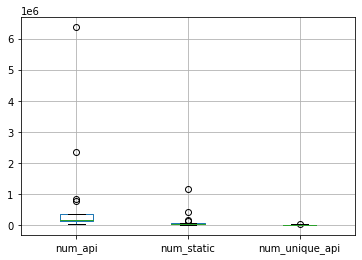

In [89]:
# Generate boxplots
df.boxplot(column=['num_api', 'num_static', 'num_unique_api'])